In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm

In [4]:
arr = range(100)
cut = np.percentile(np.array(arr),[40,60])
test = 50
if (test>cut[0]) & (test<cut[1]):
    print('test')

test


In [18]:
root = '/home/jini1114/git/MODNet/data'
files = os.listdir(os.path.join(root,'Images'))
idx = 0
thrshold = 150
img = cv2.imread(os.path.join(root,'Images',files[idx]))

mask = cv2.imread(os.path.join(root,'Masks',files[idx][:-3]+'png'))
mask = mask[:,:,0]
mask[mask <thrshold] = 0
mask[mask >=thrshold] = 1

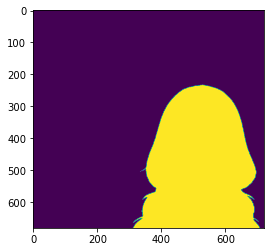

126915

In [19]:
plt.imshow(mask)
plt.show()
Counter(mask.flatten())[1]

In [20]:
pix = []
for i in tqdm(range(len(files))):
        
    mask = cv2.imread(os.path.join(root,'Masks',files[i][:-3]+'png'))
    mask = mask[:,:,0]
    mask[mask <thrshold] = 0
    mask[mask >=thrshold] = 1   
    count = Counter(mask.flatten())[1]
    pix.append(count)

100%|█████████▉| 27759/27760 [25:19<00:00, 18.27it/s]


TypeError: 'NoneType' object is not subscriptable

(array([ 152., 1536., 1619., 3148., 3098., 4183., 4338., 4502., 3370.,
        1813.]),
 array([114728. , 116746.1, 118764.2, 120782.3, 122800.4, 124818.5,
        126836.6, 128854.7, 130872.8, 132890.9, 134909. ]),
 <BarContainer object of 10 artists>)

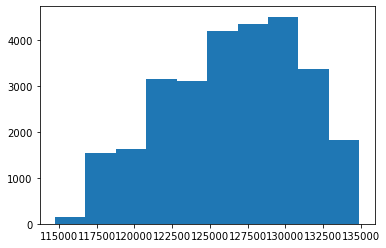

In [23]:
plt.hist(pix)

In [17]:
min_pix = 114660
max_pix = 134912
for idx in tqdm(range(len(files))):
    if pix[idx] < min_pix : 
        os.system('rm '+os.path.join(root,'Masks',files[i][:-3]+'png'))
        os.system('rm '+os.path.join(root,'Images',files[idx]))

    elif pix[idx] > max_pix : 
        os.system('rm '+os.path.join(root,'Masks',files[i][:-3]+'png'))
        os.system('rm '+os.path.join(root,'Images',files[idx]))
        

100%|██████████| 30958/30958 [01:03<00:00, 487.22it/s]


In [26]:
len(files)

27760

In [28]:
new_dir = '/home/jini1114/git/MODNet/data/test'
for idx in tqdm(range(len(files))):
    if idx%100 == 0 : 
        os.system('cp '+os.path.join(root,'Masks',files[idx][:-3]+'png '+os.path.join(new_dir,'Masks',files[idx][:-3]+'png')))
        os.system('cp '+os.path.join(root,'Images',files[idx]+' '+os.path.join(new_dir,'Images',files[idx])))

100%|██████████| 27760/27760 [00:05<00:00, 4628.86it/s]
